In [13]:
import numpy as np
import CPMP_attention_model as cpmp_att
import tensorflow as tf
from copy import deepcopy

In [7]:
import cpmp_ml

In [12]:
from cpmp_ml import generate_random_layout, Layout, get_move

In [2]:
model_5x5_multi = cpmp_att.CPMP_attention_model()
model_5x5_multi.set_model("models/model_cpmp_5x5_test.h5")

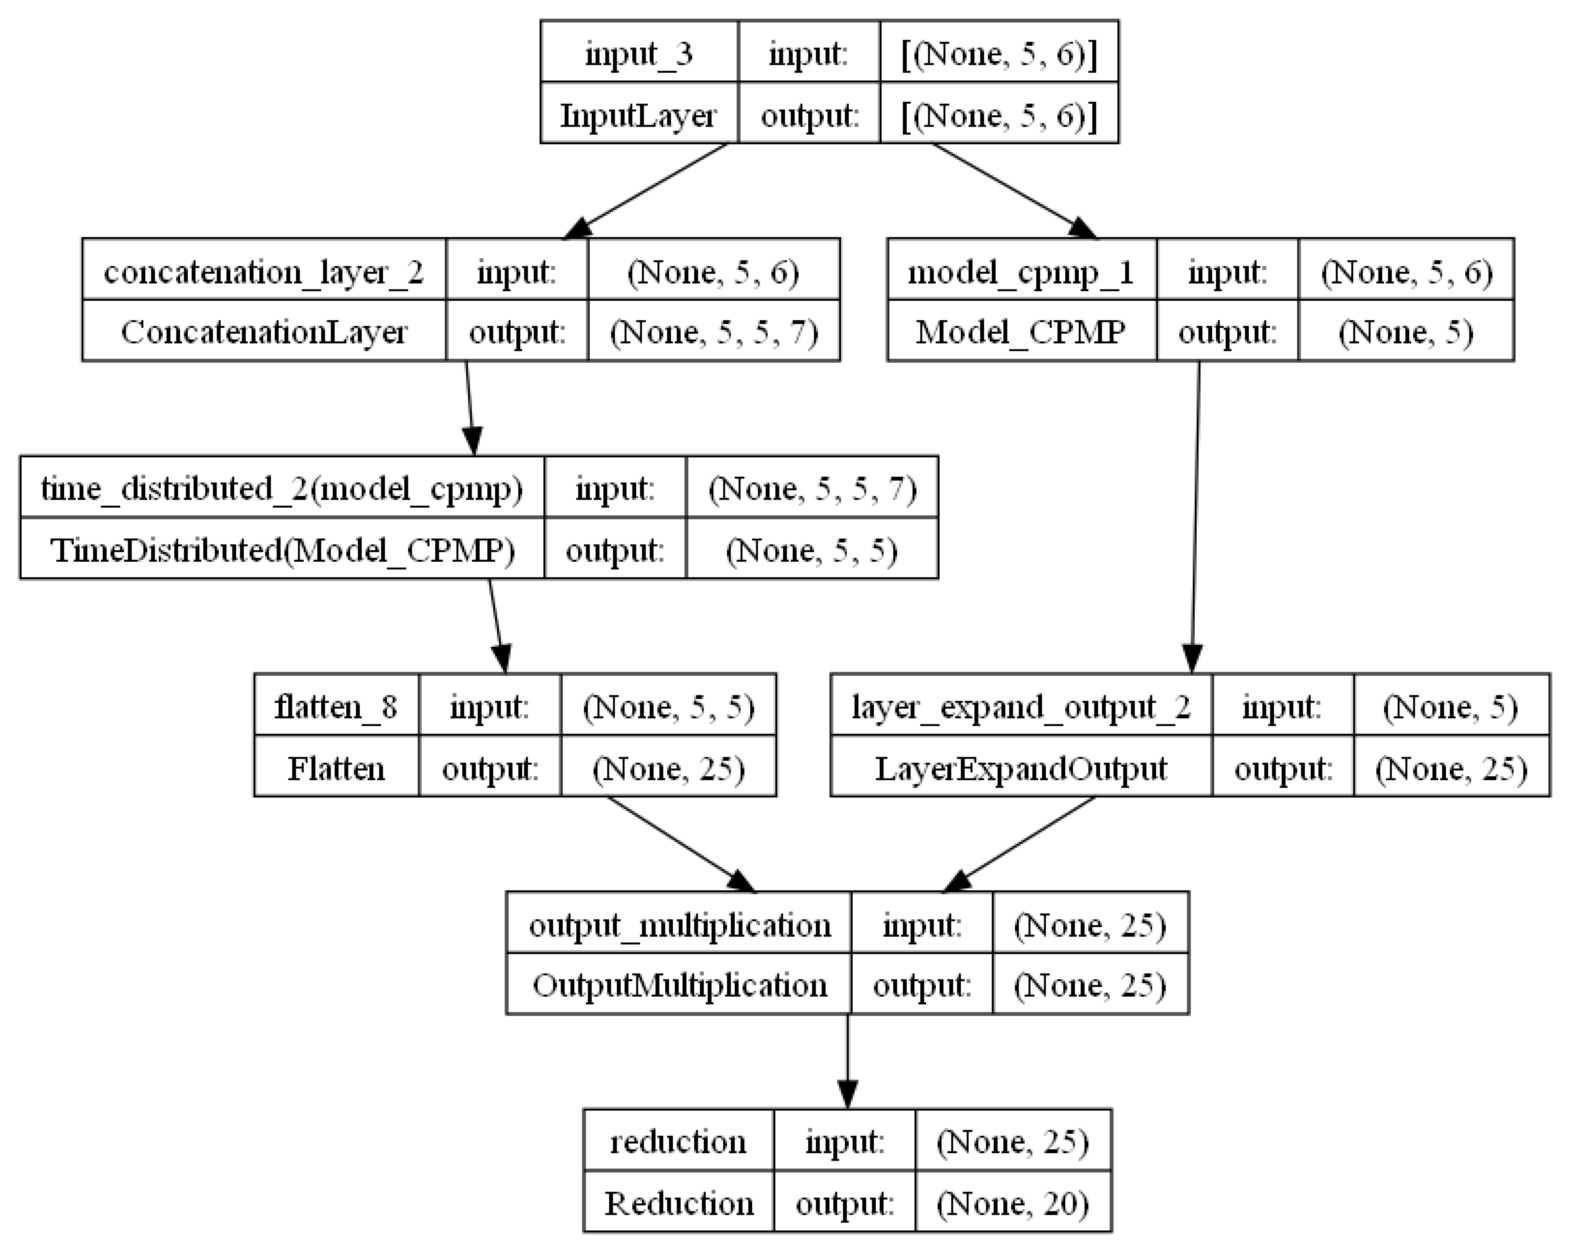

In [4]:
model_5x5_multi.plot_model()

In [11]:
def get_ann_state(layout: cpmp_ml.Layout) -> np.ndarray:
  S=len(layout.stacks) # Cantidad de stacks
  #matriz de stacks
  b = 2. * np.ones([S,layout.H + 1]) # Matriz normalizada
  for i,j in enumerate(layout.stacks):
     b[i][layout.H-len(j) + 1:] = [k/layout.total_elements for k in j]
     b[i][0] = layout.is_sorted_stack(i)
  b.shape=(S,(layout.H + 1))
  return b

In [ ]:


# Definir hiperparámetros y funciones auxiliares
num_actions = 20
epsilon = 0.1
gamma = 0.9

def choose_action(state, model, S, H):
    if np.random.rand() < epsilon:
        # Se escoge alguna posición aleatoria 
        return (np.random.choice(S), np.random.choice(S) ) 
    else:
        # Se escoge según el modelo
        q_values = model.predict(state)
        act = np.argmax(q_values)

        return get_move(act,S=S,H=H)

def update_q_values(state, action, reward, next_state, model):
    q_values = model.predict(state)
    next_q_values = model.predict(next_state)
    target = reward + gamma * np.max(next_q_values)
    q_values[0][action] = target

    # Entrenar el modelo con la nueva información
    model.fit(state, q_values)

# Entrenamiento con Q-learning
def q_learning(model ,num_episodes=1000):
    for episode in range(num_episodes):
        layout = generate_random_layout(S=5,H=5,N=15) 
        state = get_ann_state(layout=layout)
        total_reward = 0

        while True:
            action = choose_action(state, model)

            # Simular el entorno y obtener la recompensa
            next_state = layout.move(action)  # simulación de siguiente estado
            

            # Falta función de recompensa
            # 1. Usar el número de pasos totales a la solución más optima (requiere explorar todas las soluciones)
            # 2. 
            reward =  recompensa()

            update_q_values(state, action, reward, next_state, model)

            state = next_state
            total_reward += reward

            # Condición de finalización (simulada)
            if cond_termino():
                break

# Uso del código
q_learning()


In [ ]:
def cond_termino():

def recompensa()